In [45]:
import pandas as pd
import pylab as pl
import numpy as np
import types
from botocore.client import Config
import ibm_boto3
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

#Load data

In [ ]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_97ff5280ec39471bbfab852056f760de = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='98CP9mjfrexSdN5yjLI1_fr50zwrvcrqjl9nhOsihLHk',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_97ff5280ec39471bbfab852056f760de.get_object(Bucket='predictnumberofcostumersleavingse-donotdelete-pr-bb2govzpwvgw9k',Key='ChurnData.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

churn_df = pd.read_csv(body)
df_data_1.head()


In [8]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


Preprocessing

In [9]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn']=churn_df['churn'].astype(int)

In [10]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [18]:
X=np.asarray (churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']])

In [19]:
X


array([[11., 33.,  7., ...,  1.,  1.,  1.],
       [33., 33., 12., ...,  0.,  0.,  1.],
       [23., 30.,  9., ...,  0.,  0.,  0.],
       ...,
       [ 6., 32., 10., ...,  1.,  0.,  0.],
       [24., 30.,  0., ...,  1.,  1.,  1.],
       [61., 50., 16., ...,  1.,  1.,  0.]])

In [15]:
y=np.asarray(churn_df[['churn']])

In [16]:
y

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
    

#Normalizing Data

In [20]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [21]:
X

array([[-1.13518441, -0.62595491, -0.4588971 , ...,  0.64686916,
         1.56469673,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, ..., -1.54590766,
        -0.63910148,  1.56469673],
       [-0.57928917, -0.85594447, -0.261522  , ..., -1.54590766,
        -0.63910148, -0.63910148],
       ...,
       [-1.36680743, -0.7026181 , -0.16283445, ...,  0.64686916,
        -0.63910148, -0.63910148],
       [-0.53296457, -0.85594447, -1.14970993, ...,  0.64686916,
         1.56469673,  1.56469673],
       [ 1.18104577,  0.67731925,  0.42929083, ...,  0.64686916,
         1.56469673, -0.63910148]])

Train/Test dataset

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)
print("train set is:",X_train.shape,y_train.shape)
print("test set is:",X_test.shape,y_test.shape)

train set is: (160, 10) (160, 1)
test set is: (40, 10) (40, 1)


Modeling

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
LR


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
yhat = LR.predict(X_test)

In [40]:
yhat

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [36]:
yhat_prob=LR.predict_proba(X_test)


In [37]:
yhat_prob

array([[0.30851851, 0.69148149],
       [0.26480103, 0.73519897],
       [0.75162656, 0.24837344],
       [0.33860326, 0.66139674],
       [0.52534466, 0.47465534],
       [0.28807123, 0.71192877],
       [0.61037242, 0.38962758],
       [0.25854779, 0.74145221],
       [0.64170956, 0.35829044],
       [0.36178984, 0.63821016],
       [0.5238168 , 0.4761832 ],
       [0.36201095, 0.63798905],
       [0.63382543, 0.36617457],
       [0.50714685, 0.49285315],
       [0.3150867 , 0.6849133 ],
       [0.56770825, 0.43229175],
       [0.6109721 , 0.3890279 ],
       [0.65230521, 0.34769479],
       [0.63364138, 0.36635862],
       [0.65339309, 0.34660691],
       [0.31392171, 0.68607829],
       [0.45901539, 0.54098461],
       [0.54334518, 0.45665482],
       [0.73216165, 0.26783835],
       [0.56037756, 0.43962244],
       [0.71522841, 0.28477159],
       [0.58432711, 0.41567289],
       [0.63168808, 0.36831192],
       [0.7376811 , 0.2623189 ],
       [0.64484875, 0.35515125],
       [0.

Evaluation

In [41]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.975

In [ ]:
Confusion Matrix

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[14  0]
 [ 1 25]]


Confusion matrix, without normalization
[[14  0]
 [ 1 25]]


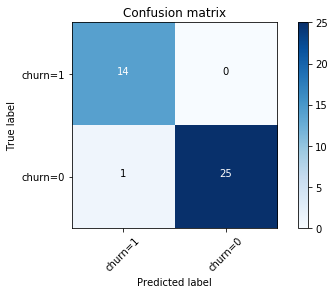

In [48]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [49]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.93      1.00      0.97        14

   micro avg       0.97      0.97      0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



Log Los

In [50]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4465955777652738